<a href="https://colab.research.google.com/github/sharop/TallerGrafos24/blob/main/Clase_2_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install python-louvain

#**Caminata Trayectoria y Ciclo**

Vamos a realizar los siguientes ejemplos utilizando el grafo visto en el notebook anterior.


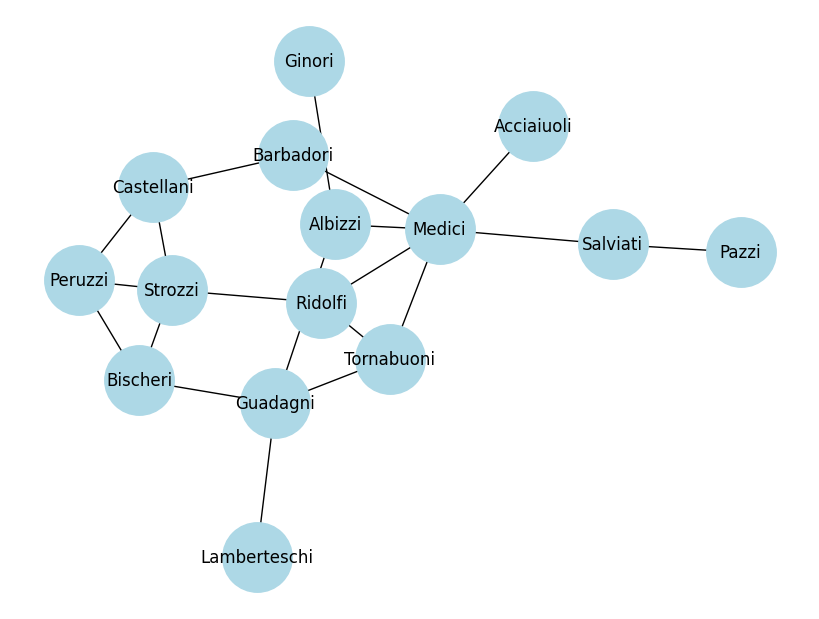

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el grafo de familias florentinas
G = nx.florentine_families_graph()

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # para un diseño consistente
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)


In [3]:
G.nodes()

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

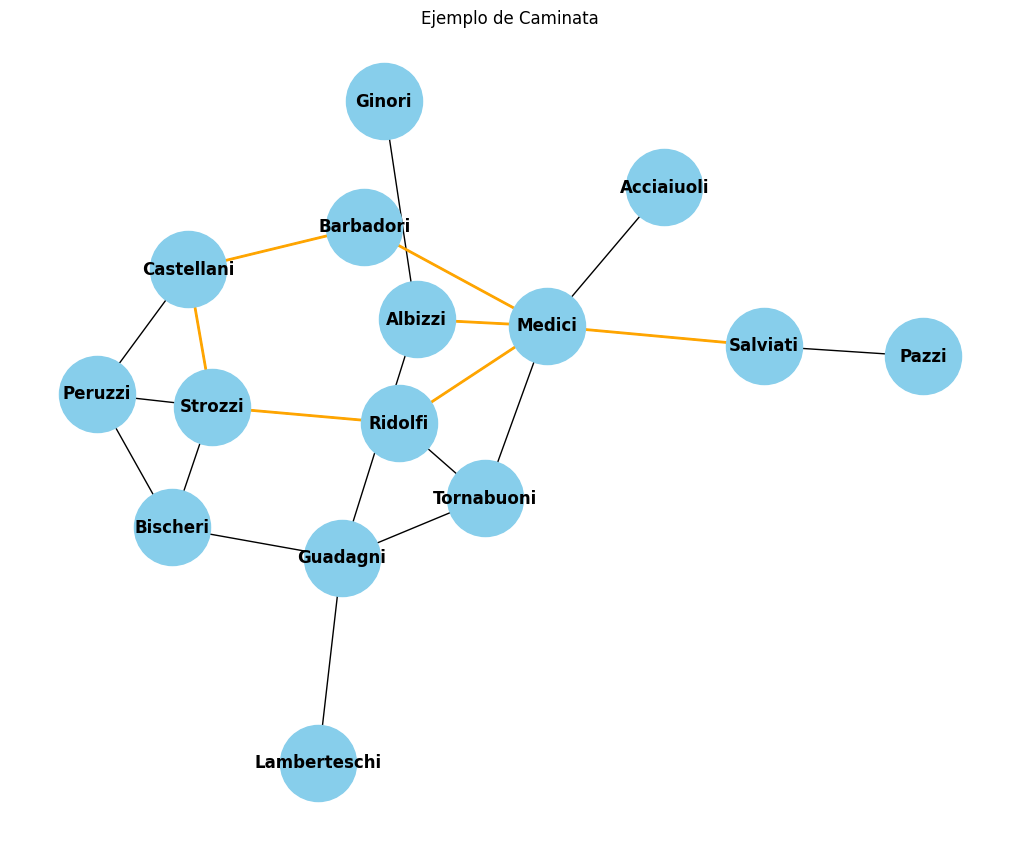

In [4]:
# Ejemplo de Caminata
walk = ["Albizzi","Medici", "Barbadori", "Castellani", "Strozzi", "Ridolfi", "Medici", "Salviati"]
walk_edges = list(zip(walk, walk[1:]))

# Visualización de la Caminata
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=walk_edges, edge_color="orange", width=2)
plt.title("Ejemplo de Caminata")
plt.show()


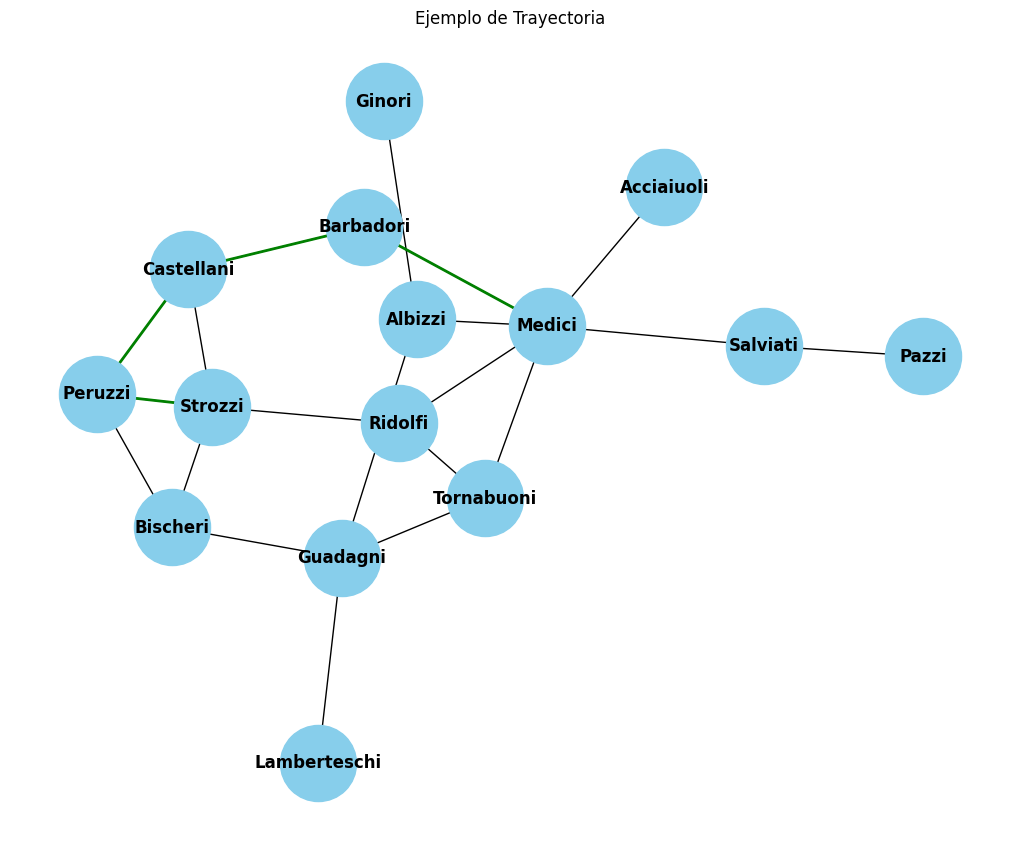

In [5]:
# Ejemplo de Trayectoria
path = ["Medici", "Barbadori", "Castellani", "Peruzzi", "Strozzi"]
path_edges = list(zip(path, path[1:]))

# Visualización de la Trayectoria
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="green", width=2)
plt.title("Ejemplo de Trayectoria")
plt.show()


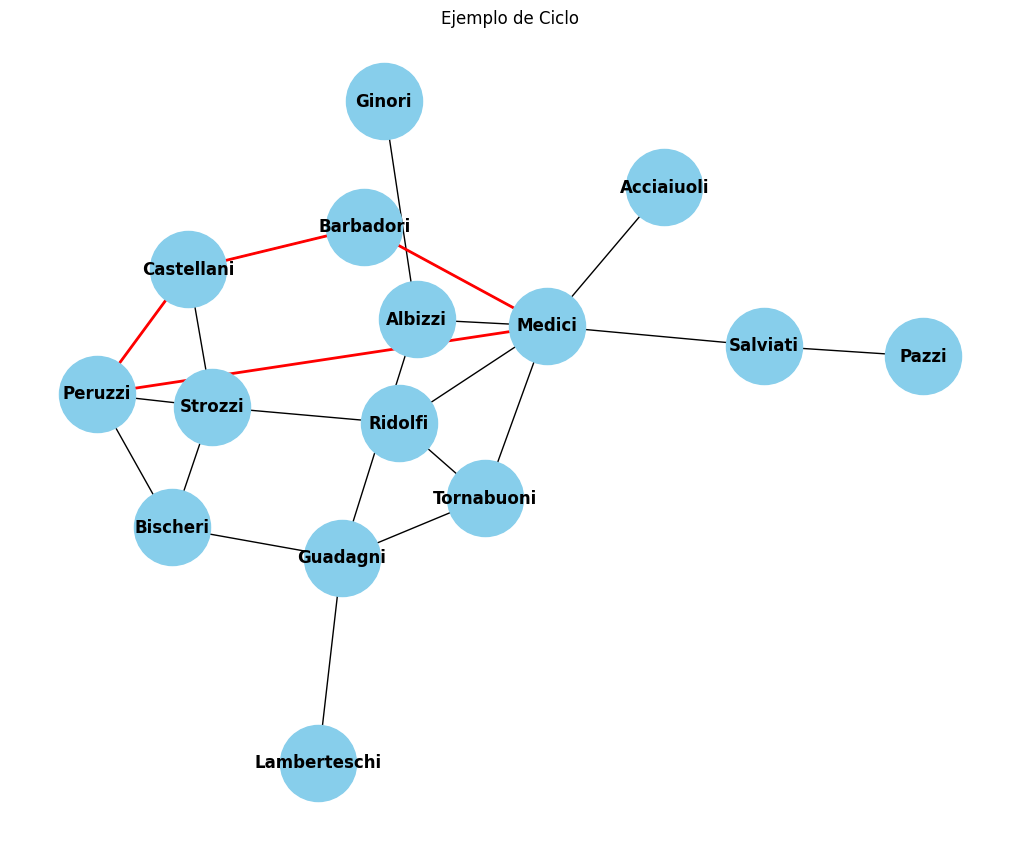

In [6]:
# Ejemplo de Ciclo
cycle = ["Medici", "Barbadori", "Castellani", "Peruzzi", "Medici"]
cycle_edges = list(zip(cycle, cycle[1:] + [cycle[0]]))

# Visualización del Ciclo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color="red", width=2)
plt.title("Ejemplo de Ciclo")
plt.show()

# Diámetro del grafo
El diámetro de un grafo es la mayor distancia entre cualquier par de vértices en el grafo. Este concepto es crucial porque proporciona una medida de la extensión de la red.

Formalmente:

Sea
- $G=(V,E)$ un grafo con el conjunto de vértices V y el conjunto de aristas E.
- Para cada par de vértices $u,v∈V$, se define $d(u,v)$ como la longitud del camino más corto entre $u$ y $v$.
- El diámetro del grafo G, denotado como
$D(G)= \max_{u,v∈V}{d(u,v)}$

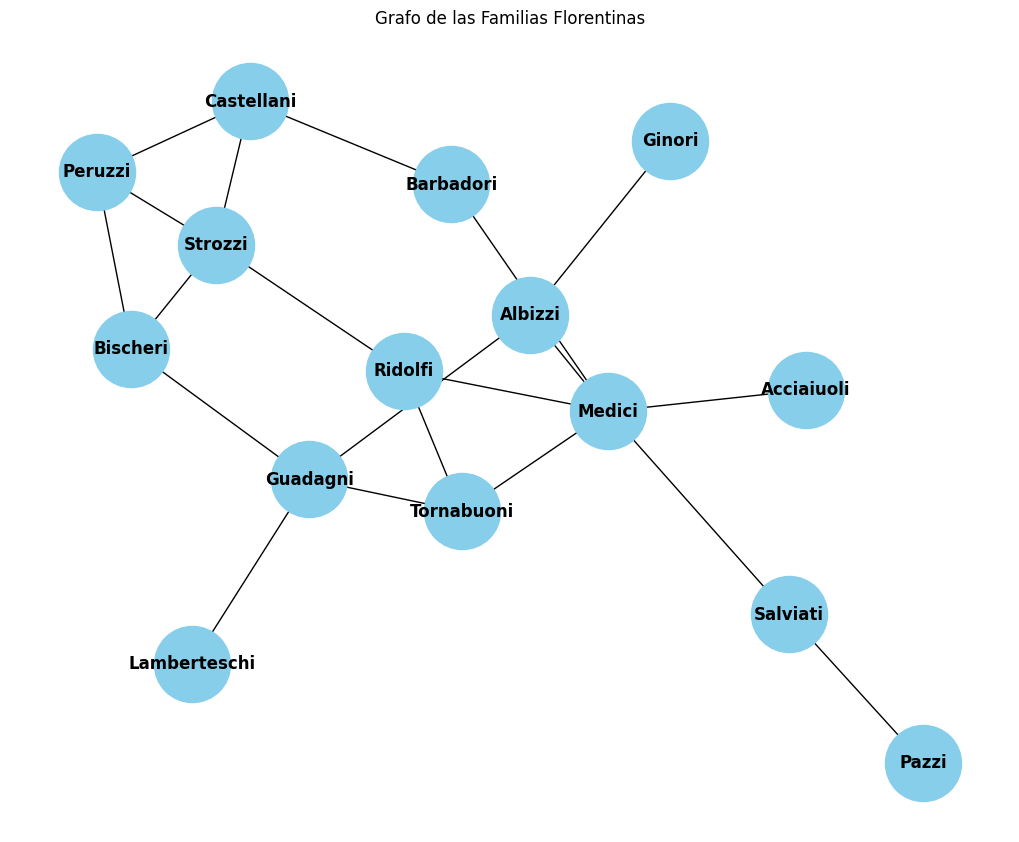

El diámetro del grafo de las familias florentinas es: 5


In [7]:
# Calcular el diámetro del grafo
diameter = nx.diameter(G)

# Visualización del grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Grafo de las Familias Florentinas")
plt.show()

# Mostrar el diámetro del grafo
print(f"El diámetro del grafo de las familias florentinas es: {diameter}")

# Longitud Media de la Trayectoria (Average Path Length)

La longitud media de la trayectoria en un grafo es el promedio de todas las distancias mínimas entre pares de vértices. Es una medida de cuán "cercanos" están los nodos en promedio dentro de la red.





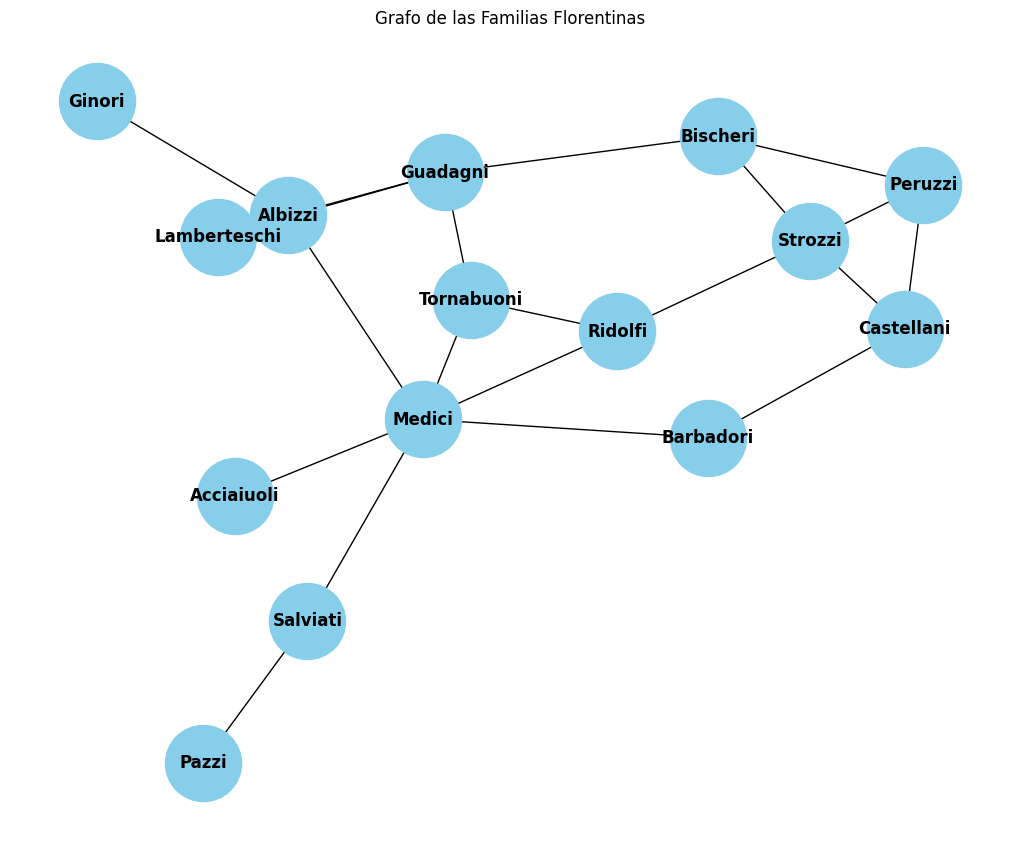

(Average Path Length) del grafo 2.4857142857142858


In [8]:
# Calcular el Average Path Length del grafo
average_path_length = nx.average_shortest_path_length(G)

# Visualización del grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Grafo de las Familias Florentinas")
plt.show()

# Mostrar el Average Path Length del grafo
print(f"(Average Path Length) del grafo", average_path_length)

# Teoría de la Conectividad (Connectedness)

La conectividad de un grafo se refiere a la propiedad de que existe un camino entre cualquier par de vértices en el grafo. Un grafo conectado es aquel en el que todos los vértices están interconectados por algún camino. La conectividad es una medida fundamental de la robustez y cohesión de una red.

## Tipos de Conectividad:

- **Grafo Conectado**: Un grafo no dirigido es conectado si existe un camino entre cada par de vértices.
- **Componente Conexa**: Si un grafo no es completamente conectado, se puede descomponer en componentes conexas, que son subgrafos en los que cualquier par de vértices está conectado por un camino.
- **Conectividad de Vértice (Vertex Connectivity)**: El número mínimo de vértices que deben ser eliminados para desconectar el grafo.
Conectividad de Arista (Edge Connectivity): El número mínimo de aristas que deben ser eliminadas para desconectar el grafo.

es posible determinar si un grafo es conexo usando un algoritmo de búsqueda en anchura (BFS) o búsqueda en profundidad (DFS).


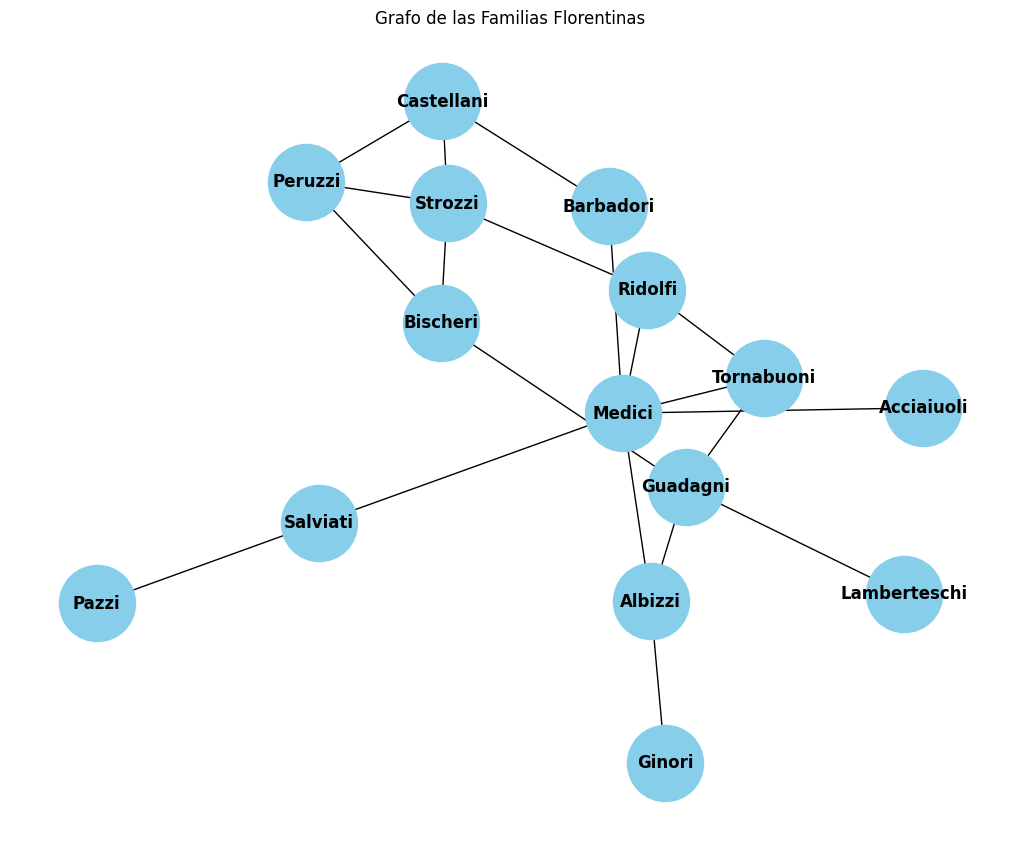

El grafo de las familias florentinas es conectado: True
Número de componentes conexas: 1
Componentes conexas: [{'Medici', 'Peruzzi', 'Guadagni', 'Lamberteschi', 'Acciaiuoli', 'Albizzi', 'Ridolfi', 'Salviati', 'Bischeri', 'Barbadori', 'Castellani', 'Strozzi', 'Ginori', 'Tornabuoni', 'Pazzi'}]
Conectividad de vértice: 1
Conectividad de arista: 1


In [9]:
# Calcular la conectividad del grafo
is_connected = nx.is_connected(G)
components = list(nx.connected_components(G))
num_components = nx.number_connected_components(G)
vertex_connectivity = nx.node_connectivity(G)
edge_connectivity = nx.edge_connectivity(G)

# Visualización del grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Grafo de las Familias Florentinas")
plt.show()

# Mostrar la conectividad del grafo
print(f"El grafo de las familias florentinas es conectado: {is_connected}")
print(f"Número de componentes conexas: {num_components}")
print(f"Componentes conexas: {components}")
print(f"Conectividad de vértice: {vertex_connectivity}")
print(f"Conectividad de arista: {edge_connectivity}")

# Centralidad de Grado

La centralidad de grado es una medida de la importancia de un nodo en un grafo basada en el número de conexiones (o aristas) que tiene. Es una de las métricas más simples y directas para evaluar la influencia de un nodo dentro de una red.

Interpretación:

* Un nodo con alta centralidad de grado tiene muchas conexiones directas y, por lo tanto, puede influir o acceder a una gran parte de la red de manera inmediata.
* En redes dirigidas, se pueden calcular dos tipos de centralidades de grado:
Centralidad de grado de entrada (in-degree): Número de aristas entrantes a un nodo.
* Centralidad de grado de salida (out-degree): Número de aristas salientes desde un nodo.


Al ejecutar el codigo obtenemos lista de familias con sus respectivas centralidades de grado, lo que nos permite identificar qué familias tienen el mayor número de conexiones directas en la red de las familias florentinas. Los nodos más grandes en el gráfico representan las familias con mayor centralidad de grado

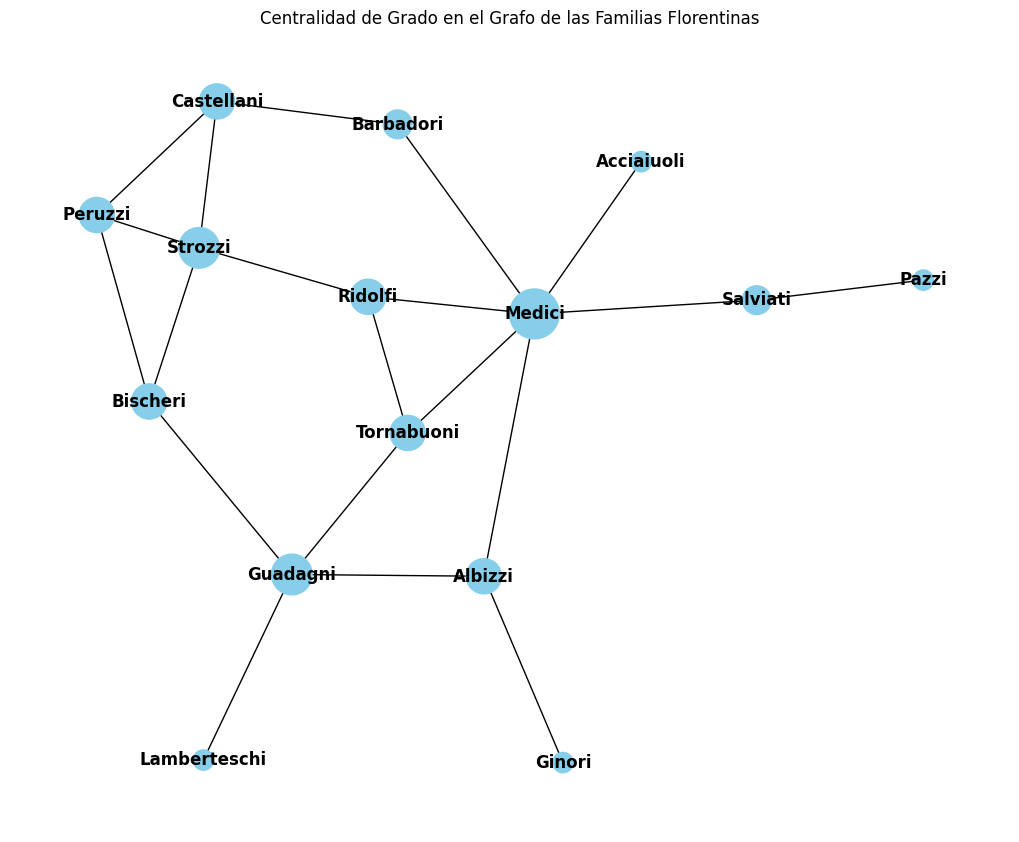

Medici: 0.4286
Strozzi: 0.2857
Guadagni: 0.2857
Castellani: 0.2143
Peruzzi: 0.2143
Ridolfi: 0.2143
Tornabuoni: 0.2143
Albizzi: 0.2143
Bischeri: 0.2143
Barbadori: 0.1429
Salviati: 0.1429
Acciaiuoli: 0.0714
Pazzi: 0.0714
Ginori: 0.0714
Lamberteschi: 0.0714


In [10]:
# Calcular la centralidad de grado
degree_centrality = nx.degree_centrality(G)

# Visualización del grafo con centralidad de grado
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=[v * 3000 for v in degree_centrality.values()],
        node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Centralidad de Grado en el Grafo de las Familias Florentinas")
plt.show()

# Ordenar el diccionario por sus valores en orden descendente
sorted_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

# Mostrar la centralidad de grado
for family, centrality in sorted_degree_centrality.items():
    print(f"{family}: {centrality:.4f}")

# Teoría de la Centralidad del Vector Propio (Eigenvector Centrality)

La lista de familias obtenida nos muestra sus centralidades del vector propio, lo que nos permite identificar qué familias son las más influyentes en la red de las familias florentinas. Los nodos más grandes en el gráfico representan las familias con mayor centralidad del vector propio

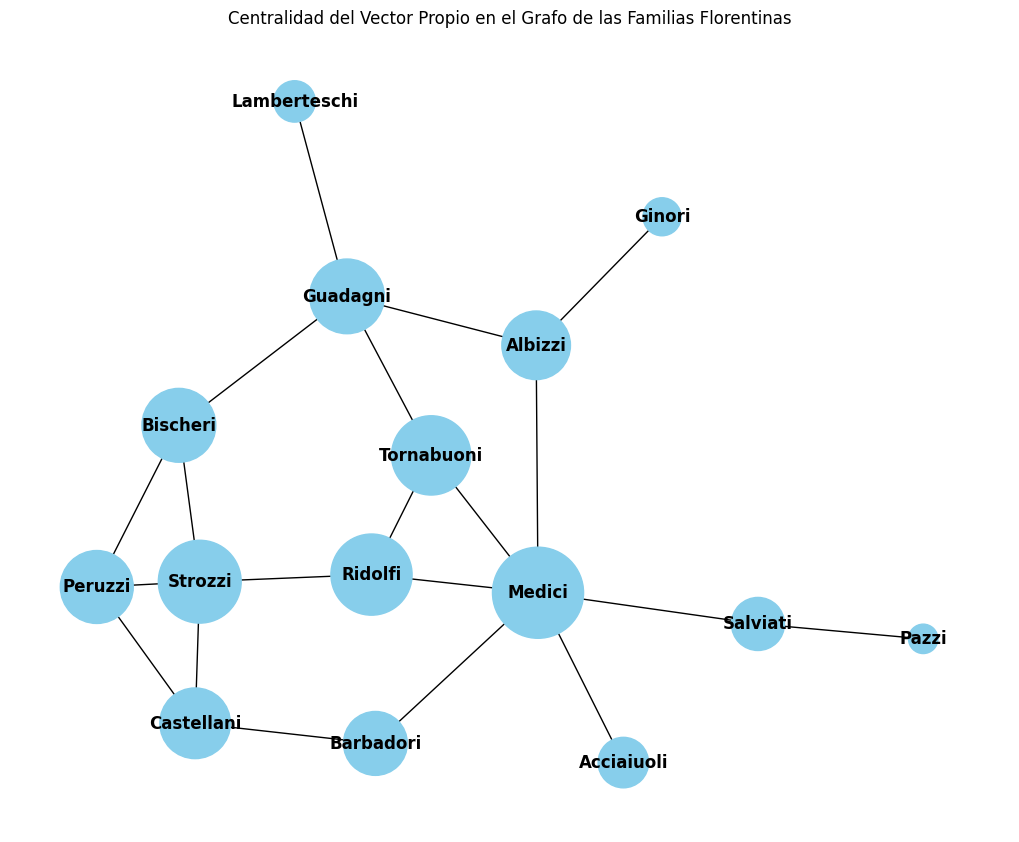

Medici: 0.4303
Strozzi: 0.3560
Ridolfi: 0.3416
Tornabuoni: 0.3258
Guadagni: 0.2891
Bischeri: 0.2828
Peruzzi: 0.2757
Castellani: 0.2590
Albizzi: 0.2440
Barbadori: 0.2117
Salviati: 0.1459
Acciaiuoli: 0.1322
Lamberteschi: 0.0888
Ginori: 0.0749
Pazzi: 0.0448


In [11]:
# Calcular la centralidad del vector propio
eigenvector_centrality = nx.eigenvector_centrality(G)

# Visualización del grafo con centralidad del vector propio
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=[v * 10000 for v in eigenvector_centrality.values()],
        node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Centralidad del Vector Propio en el Grafo de las Familias Florentinas")
plt.show()

sorted_eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

# Mostrar la centralidad del vector propio
for family, centrality in sorted_eigenvector_centrality.items():
    print(f"{family}: {centrality:.4f}")

# Teoría de la intermediación (Betweeness centrality)

El resultados es una lista de familias con sus respectivas centralidades de intermediación, lo que nos permite identificar qué familias actúan como puentes o intermediarios importantes en la red de las familias florentinas.

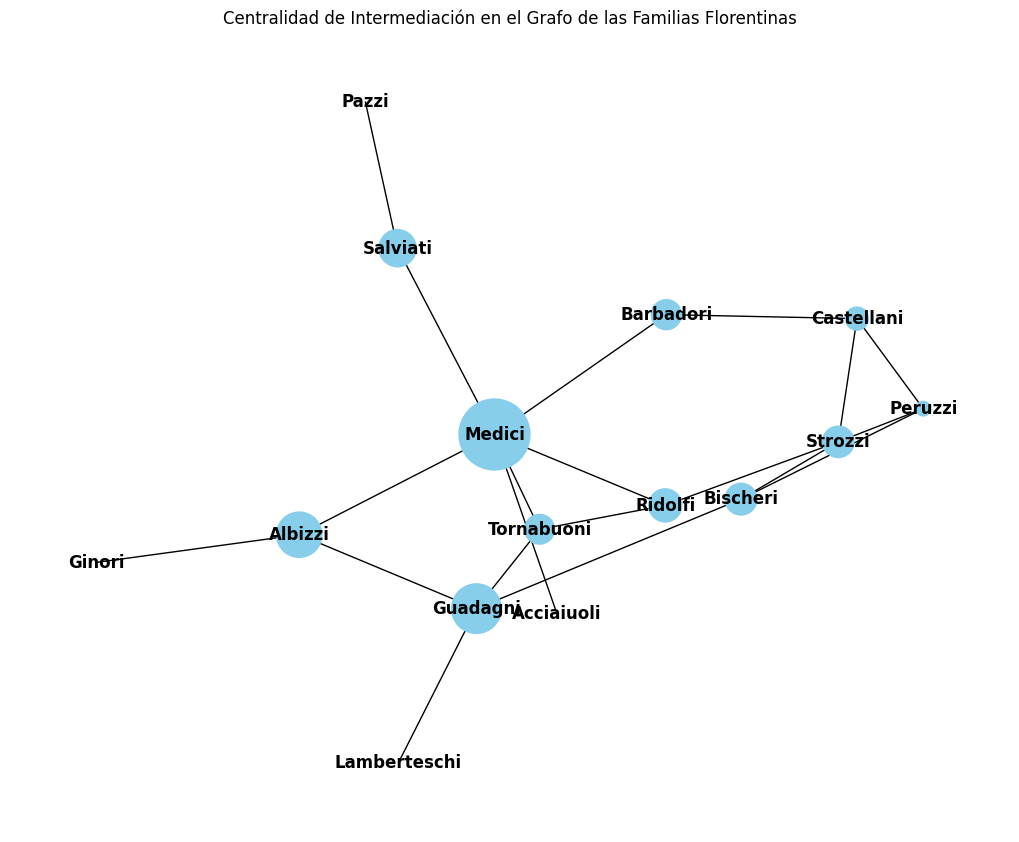

Medici: 0.5220
Guadagni: 0.2546
Albizzi: 0.2125
Salviati: 0.1429
Ridolfi: 0.1136
Bischeri: 0.1044
Strozzi: 0.1026
Barbadori: 0.0934
Tornabuoni: 0.0916
Castellani: 0.0549
Peruzzi: 0.0220
Acciaiuoli: 0.0000
Pazzi: 0.0000
Ginori: 0.0000
Lamberteschi: 0.0000


In [14]:
# Calcular la centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)

# Visualización del grafo con centralidad de intermediación
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=[v * 5000 for v in betweenness_centrality.values()],
        node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Centralidad de Intermediación en el Grafo de las Familias Florentinas")
plt.show()

sorted_betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

# Mostrar la centralidad de intermediación
for family, centrality in sorted_betweenness_centrality.items():
    print(f"{family}: {centrality:.4f}")


# Teoría de la Centralidad de Cercanía (Closeness Centrality)
obtendremos una lista de familias con sus respectivas centralidades de cercanía, lo que nos permite identificar qué familias están más centralmente ubicadas en la red y, por lo tanto, pueden difundir información de manera más eficiente. Los nodos más grandes en el gráfico representan las familias con mayor centralidad de cercanía.

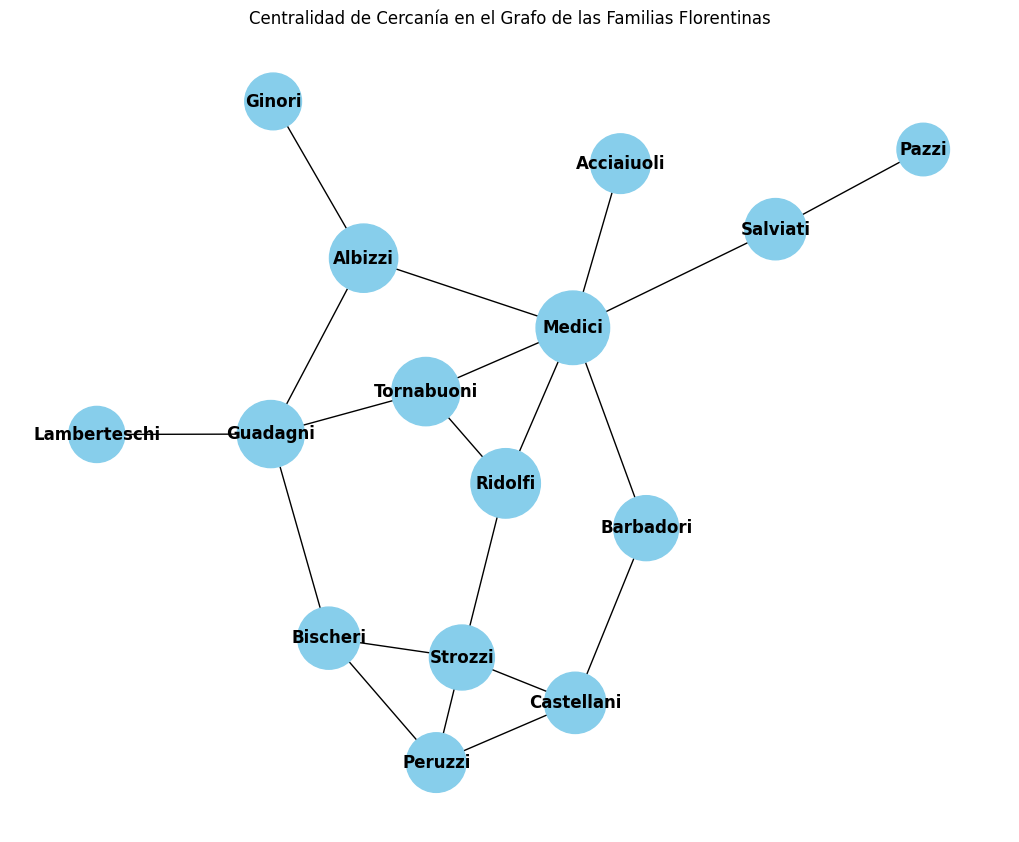

Medici: 0.5600
Ridolfi: 0.5000
Tornabuoni: 0.4828
Albizzi: 0.4828
Guadagni: 0.4667
Strozzi: 0.4375
Barbadori: 0.4375
Bischeri: 0.4000
Castellani: 0.3889
Salviati: 0.3889
Acciaiuoli: 0.3684
Peruzzi: 0.3684
Ginori: 0.3333
Lamberteschi: 0.3256
Pazzi: 0.2857


In [19]:


# Calcular la centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G)

# Visualización del grafo con centralidad de cercanía
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=[v * 5000 for v in closeness_centrality.values()],
        node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Centralidad de Cercanía en el Grafo de las Familias Florentinas")
plt.show()

# Ordenar el diccionario por sus valores en orden descendente
sorted_closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))

# Mostrar la centralidad de cercanía
for family, centrality in sorted_closeness_centrality.items():
    print(f"{family}: {centrality:.4f}")


#Coeficiente de Clustering
El resultado sera una lista de familias con sus respectivos coeficientes de clustering locales, así como el coeficiente de clustering global del grafo. Esto nos permitirá entender que tan densamente conectados están los vecinos de cada familia y la densidad general de la red en términos de la formación de clústeres.

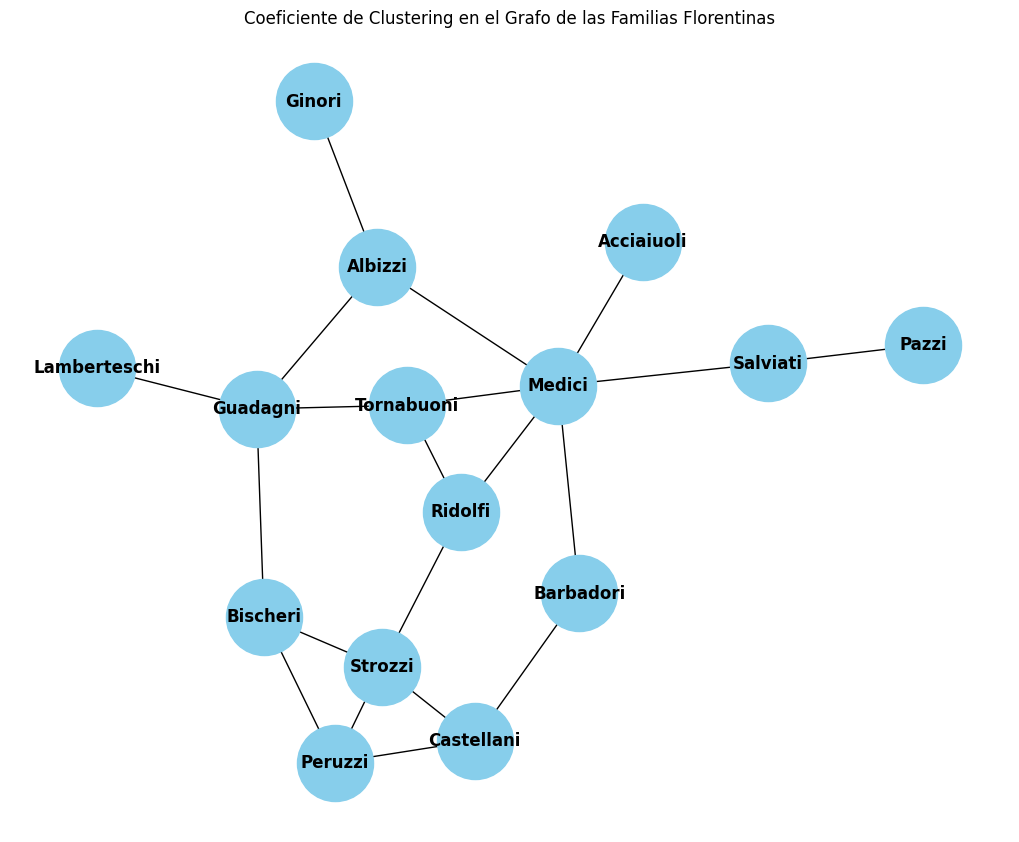

Coeficiente de Clustering Local:
Peruzzi: 0.6667
Castellani: 0.3333
Strozzi: 0.3333
Ridolfi: 0.3333
Tornabuoni: 0.3333
Bischeri: 0.3333
Medici: 0.0667
Acciaiuoli: 0.0000
Barbadori: 0.0000
Albizzi: 0.0000
Salviati: 0.0000
Pazzi: 0.0000
Guadagni: 0.0000
Ginori: 0.0000
Lamberteschi: 0.0000

Coeficiente de Clustering Global: 0.1600


In [22]:

# Calcular el coeficiente de clustering local para cada nodo
clustering_coefficient_local = nx.clustering(G)

# Calcular el coeficiente de clustering global
clustering_coefficient_global = nx.average_clustering(G)

# Visualización del grafo con coeficiente de clustering
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
plt.title("Coeficiente de Clustering en el Grafo de las Familias Florentinas")
plt.show()

sorted_clustering_coefficient_local = dict(sorted(clustering_coefficient_local.items(), key=lambda item: item[1], reverse=True))

# Mostrar el coeficiente de clustering local y global
print("Coeficiente de Clustering Local:")
for family, clustering in sorted_clustering_coefficient_local.items():
    print(f"{family}: {clustering:.4f}")

print(f"\nCoeficiente de Clustering Global: {clustering_coefficient_global:.4f}")


# DFS
### Deteccion de Ciclos.
Este código define dos funciones, detect_cycle y dfs_cycle. detect_cycle recorre todos los nodos del grafo y llama a dfs_cycle para cada nodo que aún no ha sido visitado. dfs_cycle utiliza DFS para explorar el grafo, y si durante la exploración se encuentra un nodo que ya ha sido visitado, eso significa que hay un ciclo.

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for neighbor in graph[start] - visited:
        dfs(graph, neighbor, visited)
    return visited

def detect_cycle(graph):
    visited = set()
    for node in graph:
        if node not in visited:
            if dfs_cycle(graph, node, visited, -1):
                return True
    return False

def dfs_cycle(graph, node, visited, parent):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            if dfs_cycle(graph, neighbor, visited, node):
                return True
        elif parent != neighbor:
            return True
    return False

graph = {'A': {'B', 'C'},
         'B': {'A', 'C', 'D'},
         'C': {'A', 'B'},
         'D': {'B'}}

print(detect_cycle(graph))



True


# BFS
### Verificación de conectividad
En este código, se usa BFS para recorrer el grafo y se verifica si todos los nodos se pueden visitar desde un nodo de inicio arbitrario. Si eso es cierto, entonces el grafo es conectado.

In [ ]:
from collections import deque

def bfs(graph, root):
    visited = set()
    queue = deque([root])

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")

        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)

def check_connectivity(graph):
    visited = set()
    bfs(graph, list(graph.keys())[0])
    return visited == set(graph.keys())

# Definimos un grafo como un diccionario
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

print("\nEs un grafo conectado?", check_connectivity(graph))


A B C A D E F 
Es un grafo conectado? False


# Dijkstra

In [ ]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    queue = [(0, start)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    return distances

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

print(dijkstra(graph, 'A'))


{'A': 0, 'B': 1, 'C': 3, 'D': 4}


# Bellman- Ford

In [ ]:
def bellman_ford(graph, start):
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[start] = 0

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[node] + graph[node][neighbour] < distance[neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[node] + graph[node][neighbour] >= distance[neighbour], "Negative weight cycle."

    return distance, predecessor

graph = {
    'A': {'B': -1, 'C':  4},
    'B': {'C': 3, 'D': 2, 'E': 2},
    'C': {},
    'D': {'B': 1, 'C': 5},
    'E': {'D': -3}
    }

distances, predecessors = bellman_ford(graph, 'A')
print(distances)


{'A': 0, 'B': -1, 'C': 2, 'D': -2, 'E': 1}


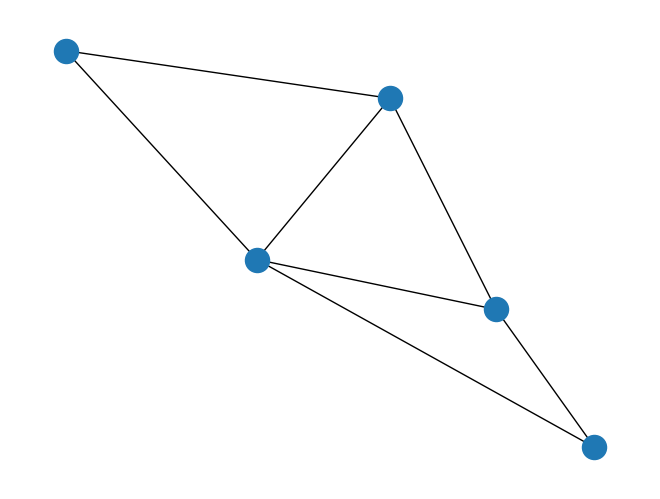

In [ ]:
# Dibujamos el grafo
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(graph, with_labels=True, )

nx.draw(G)
plt.show()

# Ejemplo practico grafo con pesos.

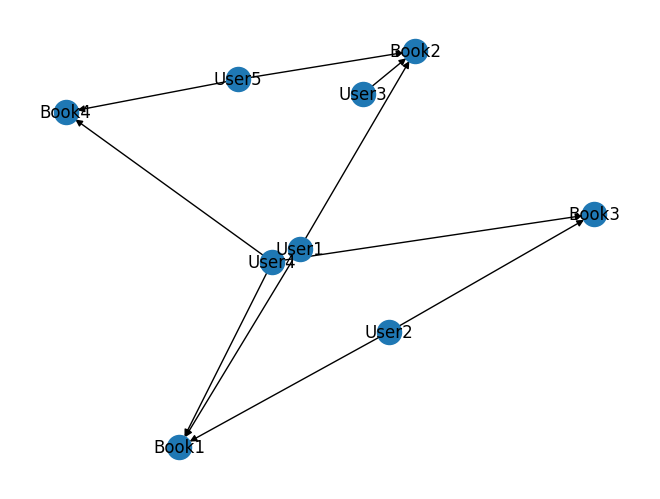

Libros recomendados: {'Book3', 'Book2', 'Book4'}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

if __name__ == '__main__':

    G = nx.DiGraph()

    # Agregamos las aristas al grafo. Las aristas van desde el usuario al libro que calificó.
    G.add_edge('User1', 'Book1')
    G.add_edge('User1', 'Book2')
    G.add_edge('User2', 'Book1')
    G.add_edge('User2', 'Book3')
    G.add_edge('User3', 'Book2')
    G.add_edge('User4', 'Book4')
    G.add_edge('User4', 'Book1')
    G.add_edge('User4', 'Book3')
    G.add_edge('User5', 'Book2')
    G.add_edge('User5', 'Book4')

    nx.draw(G, with_labels=True)
    plt.show()

    selected_book = 'Book1'

    # Encontramos los usuarios que calificaron el libro seleccionado
    users_who_rated_selected_book = [edge[0] for edge in G.in_edges(selected_book)]

    # Encontramos otros libros que estos usuarios calificaron
    recommended_books = set()
    for user in users_who_rated_selected_book:
        books_rated_by_user = [edge[1] for edge in G.out_edges(user)]
        recommended_books.update(books_rated_by_user)

    # Eliminamos el libro seleccionado de las recomendaciones
    recommended_books.discard(selected_book)

    print("Libros recomendados:", recommended_books)


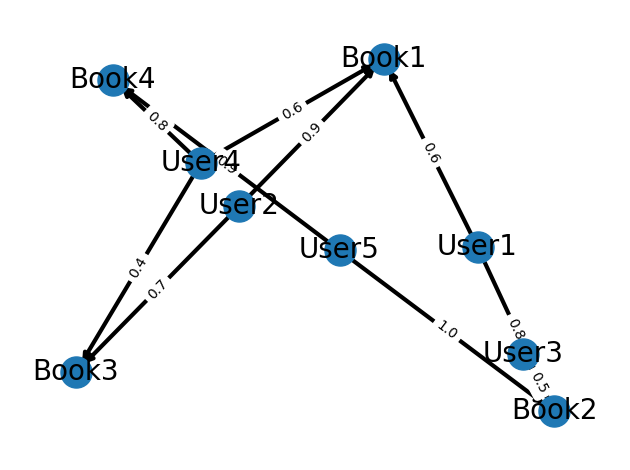

Libros recomendados: [('Book1', 0.9), ('Book4', 0.8)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


if __name__ == '__main__':

    G = nx.DiGraph()

    # Agregamos las aristas al grafo. Las aristas van desde el usuario al libro que calificó,
    # y el peso de la arista representa el tiempo transcurrido desde que el usuario calificó el libro.
    G.add_edge('User1', 'Book1', weight=0.6)
    G.add_edge('User1', 'Book2', weight=0.8)
    G.add_edge('User2', 'Book1', weight=0.9)
    G.add_edge('User2', 'Book3', weight=0.7)
    G.add_edge('User3', 'Book2', weight=0.5)
    G.add_edge('User4', 'Book4', weight=0.8)
    G.add_edge('User4', 'Book1', weight=0.6)
    G.add_edge('User4', 'Book3', weight=0.4)
    G.add_edge('User5', 'Book2', weight=1.0)
    G.add_edge('User5', 'Book4', weight=0.9)

    pos = nx.spring_layout(G, seed=7)

    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=3.0)

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    # Dibujamos el grafo
    #nx.draw(G, with_labels=True)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    selected_book = 'Book3'

    # Encontramos los usuarios que calificaron el libro seleccionado
    users_who_rated_selected_book = [edge[0] for edge in G.in_edges(selected_book)]

    # Encontramos otros libros que estos usuarios calificaron
    # Ahora también consideramos el tiempo transcurrido desde que calificaron el libro
    recommended_books = {}
    for user in users_who_rated_selected_book:
        books_rated_by_user = G.out_edges(user, data=True)
        for edge in books_rated_by_user:
            book = edge[1]
            weight = edge[2]['weight']
            if book in recommended_books:
                # Si el libro ya está en las recomendaciones, conservamos el mayor peso
                if weight > recommended_books[book]:
                    recommended_books[book] = weight
            else:
                recommended_books[book] = weight

    # Eliminamos el libro seleccionado de las recomendaciones
    del recommended_books[selected_book]

    # Ordenamos los libros recomendados por su peso y los imprimimos
    recommended_books = sorted(recommended_books.items(), key=lambda x: x[1], reverse=True)
    print("Libros recomendados:", recommended_books)


# PageRank

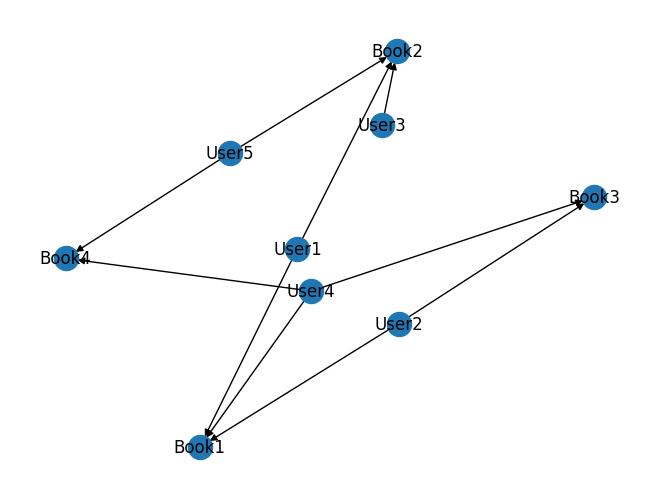

Book1: 0.1610059842369076
Book2: 0.2037730183447332
Book3: 0.1289307086560384
Book4: 0.1289307086560384


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



if __name__ == '__main__':
    G = nx.DiGraph()

    # Agregamos las aristas al grafo. Las aristas van desde el usuario al libro que calificó.
    G.add_edge('User1', 'Book1')
    G.add_edge('User1', 'Book2')
    G.add_edge('User2', 'Book1')
    G.add_edge('User2', 'Book3')
    G.add_edge('User3', 'Book2')
    G.add_edge('User4', 'Book4')
    G.add_edge('User4', 'Book1')
    G.add_edge('User4', 'Book3')
    G.add_edge('User5', 'Book2')
    G.add_edge('User5', 'Book4')

    nx.draw(G, with_labels=True)
    plt.show()

    # Usamos el algoritmo PageRank para encontrar los libros más relevantes
    pr = nx.pagerank(G)

    # Imprimimos el PageRank de cada libro
    for node, rank in pr.items():
        if 'Book' in node:
            print(f"{node}: {rank}")



# Deteccion de comunidades

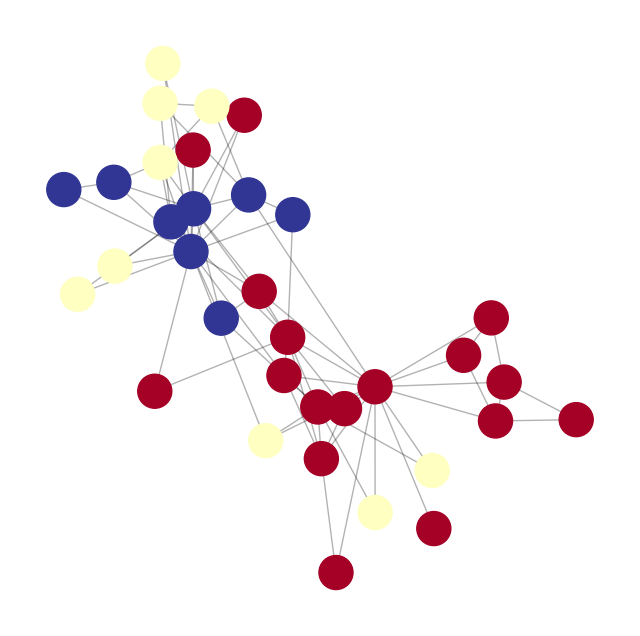

In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

# Cargar el grafo del Karate Club
G = nx.karate_club_graph()

# Calcular las comunidades
communities = greedy_modularity_communities(G)

# Crear una partición de nodos para el coloreado
partition = {node: i for i, community in enumerate(communities) for node in community}

# Dibujar el grafo con los colores de las comunidades
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show()


In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Definición del grafo de las familias florentinas
florentine_families = [
    ("Acciaiuoli", "Medici"), ("Castellani", "Peruzzi"), ("Castellani", "Strozzi"),
    ("Castellani", "Barbadori"), ("Medici", "Barbadori"), ("Medici", "Ridolfi"),
    ("Medici", "Tornabuoni"), ("Medici", "Albizzi"), ("Medici", "Salviati"),
    ("Salviati", "Pazzi"), ("Peruzzi", "Strozzi"), ("Peruzzi", "Bischeri"),
    ("Strozzi", "Ridolfi"), ("Strozzi", "Bischeri"), ("Ridolfi", "Tornabuoni"),
    ("Tornabuoni", "Guadagni"), ("Albizzi", "Ginori"), ("Albizzi", "Guadagni"),
    ("Bischeri", "Guadagni"), ("Guadagni", "Lamberteschi")
]

# Creación del grafo
G = nx.Graph()
G.add_edges_from(florentine_families)

# Detección de comunidades utilizando el algoritmo de Louvain
partition = community_louvain.best_partition(G)
# Visualización del grafo con las comunidades detectadas
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=[partition[node] for node in G.nodes()], node_size=3000, cmap=cmap, with_labels=True)
plt.title("Detección de Comunidades en el Grafo de las Familias Florentinas")
plt.show()

# Mostrar las comunidades
for community_id in set(partition.values()):
    members = [nodes for nodes in partition.keys() if partition[nodes] == community_id]
    print(f"Comunidad {community_id}: {members}")


AttributeError: module 'community' has no attribute 'best_partition'

# Ejercicio
Crea el siguiente grafo dirigido y calcula
* EigenVector centrality
* PageRank

Realiza una conclusion de los resultados.


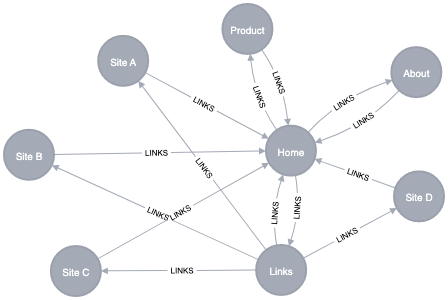